## 1. 파이썬 튜토리얼

### 함수

In [1]:
# def == define; 특정 함수 정의
def multiply(a, b):
    c = a * b
    return c

print(multiply(2,3))
print(multiply(4,5))

6
20


In [2]:
def sign(n):
    if n > 0:
        return "양수"
    elif n < 0:
        return "음수"
    else:
        return "0"

for n in [-1, 0, 1]:
    print(sign(n))

음수
0
양수


### 팩토리얼 함수 만들기

In [3]:
def fact(n):
    # 결과값의 초기값 1 할당
    result = 1
    
    for i in range(1,n+1):
        result = result * i
        
    return result

print (fact(3))
print (fact(7))

6
5040


In [4]:
import pandas as pd
import numpy as np

## 2. DSschool #2에서 Titanic model을 통해 실습한 내용을 바탕으로 Bike sharing demand에 pandas library를 적용해 본다.

### 2-1. Train, Test data를 import한다.

In [142]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])

print (train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [143]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])

print (test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [144]:
train.index

RangeIndex(start=0, stop=10886, step=1)

In [145]:
test.index

RangeIndex(start=0, stop=6493, step=1)

In [146]:
# column 가져오기

train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### 2-2. 행렬

행렬 가져오기의 기본

행(column) 가져오기

In [147]:
train["count"].head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [148]:
train[["casual", "registered", "count"]].head()

,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1


열(row) 가져오기

In [149]:
train.loc[1]

datetime      2011-01-01 01:00:00
season                          1
holiday                         0
workingday                      0
weather                         1
temp                         9.02
atemp                      13.635
humidity                       80
windspeed                       0
casual                          8
registered                     32
count                          40
Name: 1, dtype: object

In [150]:
train.loc[1:7]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3


In [151]:
train.loc [1, "season"]

1

In [152]:
train.loc[1:7, ["holiday", "workingday"]]

,holiday,workingday
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0


### 2-3. 색인

찾고자 하는 조건의 데이터 가져오기.
Pandas의 대괄호[] 안에 T/F로 이루어진 DataFrame과 길이가 같은 list를 넣어주면 True에 해당하는 행(row)만을 가져올 수 있다.

In [153]:
# 'holiday'가 '1'인 행을 가져온다.
# train["holiday"] ==1 은 holiday가 1이면 True, 0이면 False로 이루어진 list 형태의 값.

print(train[train["holiday"] == 1].shape)
train[train["holiday"] == 1].head()

(311, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3


In [154]:
# 풍속(windspeed)이 30 초과인 행을 가져온다.

print(train[train["windspeed"] > 30].shape)
print(train[train["windspeed"] > 30].head())

# 풍속(windspeed)이 40 초과인 행을 가져온다.

print(train[train["windspeed"] > 40].shape)
print(train[train["windspeed"] > 40].head())

# 풍속(windspeed)이 50 초과인 행을 가져온다.

print(train[train["windspeed"] > 50].shape)
print(train[train["windspeed"] > 50].head())

(427, 12)
               datetime  season  holiday  workingday  weather   temp   atemp  \
42  2011-01-02 19:00:00       1        0           0        1  13.12  14.395   
175 2011-01-08 14:00:00       1        0           0        1   8.20   8.335   
176 2011-01-08 15:00:00       1        0           0        1   8.20   8.335   
177 2011-01-08 16:00:00       1        0           0        1   7.38   6.820   
178 2011-01-08 17:00:00       1        0           0        1   6.56   6.060   

     humidity  windspeed  casual  registered  count  
42         42    30.0026       1          29     30  
175        32    32.9975      12          83     95  
176        32    30.0026       5          69     74  
177        29    30.0026       8          68     76  
178        37    36.9974       5          64     69  
(40, 12)
               datetime  season  holiday  workingday  weather   temp   atemp  \
750 2011-02-14 15:00:00       1        0           1        1  22.96  26.515   
752 2011-02-14 1

In [155]:
# 습도(humidity)가 비어있는 행을 가져온다. 없으므로 아무 것도 출력되지 않는다.

train[train["humidity"].isnull()].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


기본 연산

In [156]:
# 풍속의 최대값 반환
print(train["windspeed"].max())

# 풍속의 평균값 반환
print(train["windspeed"].mean())



56.9969
12.799395406945093


### 2-4. 컬럼 추가 & 수정
새로운 컬럼을 추가하거나 기존의 컬럼 수정하기

In [182]:
# season 수정

train.loc[(train["month"] == 3) | (train["month"] == 4) | (train["month"] == 5), "season"] = 1
train.loc[(train["month"] == 6) | (train["month"] == 7) | (train["month"] == 8), "season"] = 2
train.loc[(train["month"] == 9) | (train["month"] == 10) | (train["month"] == 11), "season"] = 3
train.loc[(train["month"] == 12) | (train["month"] == 1) | (train["month"] == 2), "season"] = 4

test.loc[(test["month"] == 3) | (test["month"] == 4) | (test["month"] == 5), "season"] = 1
test.loc[(test["month"] == 6) | (test["month"] == 7) | (test["month"] == 8), "season"] = 2
test.loc[(test["month"] == 9) | (test["month"] == 10) | (test["month"] == 11), "season"] = 3
test.loc[(test["month"] == 12) | (test["month"] == 1) | (test["month"] == 2), "season"] = 4

In [158]:
# 체감온도와 실제 온도의 차이 컬럼 생성; tempdiff = atemp - temp
train["tempdiff"] = train["atemp"] - train["temp"]
train["tempdiff"].head()

test["tempdiff"] = test["atemp"] - test["temp"]
test["tempdiff"].head()


0    0.705
1    2.975
2    2.975
3    2.220
4    2.220
Name: tempdiff, dtype: float64

In [159]:
# 날씨 데이터 수정: weather=4는 하나밖에 없으므로, 3으로 합친다.

train.loc[train["weather"] == 4, "weather"] =3

train.loc[train["weather"] == 4]

test.loc[test["weather"] == 4, "weather"] =3

test.loc[test["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,tempdiff


In [160]:
# datetime 쪼개서 각 정보의 컬럼 만들기

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour

# print (train[["year","month","day","hour"]].head())
train[["year","month","day","hour"]].head()

# datetime 쪼개서 각 정보의 컬럼 만들기

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour

# print (train[["year","month","day","hour"]].head())
test[["year","month","day","hour"]].head()

,year,month,day,hour
0,2011,1,20,0
1,2011,1,20,1
2,2011,1,20,2
3,2011,1,20,3
4,2011,1,20,4


In [161]:
# workingday 이면서 출퇴근시간 (7-9, 17-19)인 시간대를 rushhour로 정의

print (train[train["workingday"] == 1].shape)
print (train[train["workingday"] == 0].shape)

train.loc[(train["workingday"] == 1) & ((train["hour"] == 7) | (train["hour"] == 8) | (train["hour"] == 9) | (train["hour"] == 17) | (train["hour"] == 18) | (train["hour"] == 19)), "rushhour"] = 1
train.loc[train["rushhour"].isnull(), "rushhour"] = 0

test.loc[(test["workingday"] == 1) & ((test["hour"] == 7) | (test["hour"] == 8) | (test["hour"] == 9) | (test["hour"] == 17) | (test["hour"] == 18) | (test["hour"] == 19)), "rushhour"] = 1
test.loc[test["rushhour"].isnull(), "rushhour"] = 0


train.head()

(7412, 17)
(3474, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempdiff,year,month,day,hour,rushhour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,4.555,2011,1,1,0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,4.615,2011,1,1,1,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,4.615,2011,1,1,2,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,4.555,2011,1,1,3,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.555,2011,1,1,4,0.0


2년간 각 월을 나타내는 변수 만들기

In [162]:
train["str_year"] = train["year"].astype(str)
train["str_month"] = train["month"].astype(str)

train["ymonth"] = train["str_year"] + "_" + train["str_month"]

train.head()

test["str_year"] = test["year"].astype(str)
test["str_month"] = test["month"].astype(str)

test["ymonth"] = test["str_year"] + "_" + test["str_month"]

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,tempdiff,year,month,day,hour,rushhour,str_year,str_month,ymonth
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0.705,2011,1,20,0,0.0,2011,1,2011_1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2.975,2011,1,20,1,0.0,2011,1,2011_1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2.975,2011,1,20,2,0.0,2011,1,2011_1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2.220,2011,1,20,3,0.0,2011,1,2011_1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2.220,2011,1,20,4,0.0,2011,1,2011_1


In [163]:
# 요일 변수 만들기

train["weekday"] = train["datetime"].dt.dayofweek

train.head()

test["weekday"] = test["datetime"].dt.dayofweek

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,tempdiff,year,month,day,hour,rushhour,str_year,str_month,ymonth,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,4.555,2011,1,1,0,0.0,2011,1,2011_1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,4.615,2011,1,1,1,0.0,2011,1,2011_1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,4.615,2011,1,1,2,0.0,2011,1,2011_1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,4.555,2011,1,1,3,0.0,2011,1,2011_1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,4.555,2011,1,1,4,0.0,2011,1,2011_1,5


## 데이터 시각화

In [164]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### 날씨 관련 데이터

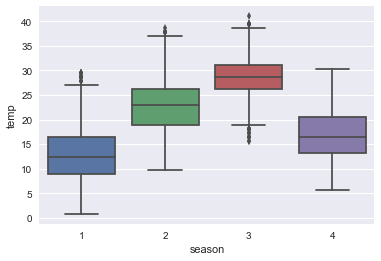

In [165]:
# 계절별 온도 값의 분포를 알아본다.

sns.boxplot(data=train, x="season", y="temp")

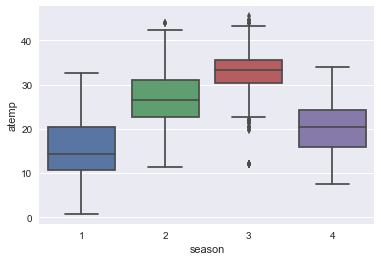

In [166]:
sns.boxplot(data=train, x="season", y="atemp")

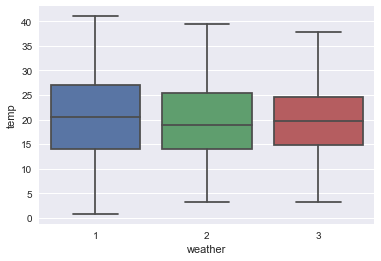

In [167]:
# 날씨에 따른 온도

sns.boxplot(data=train, x="weather", y="temp")

## weather == 4 -> 3으로 수정.

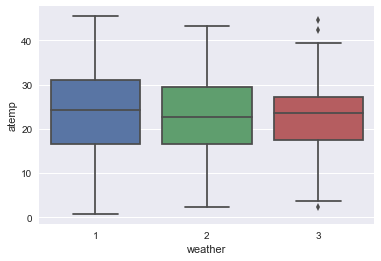

In [168]:
sns.boxplot(data=train, x="weather", y="atemp")


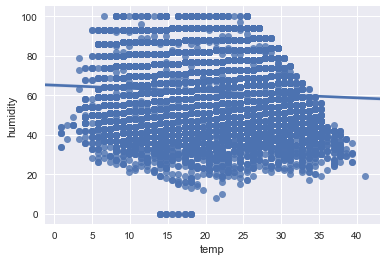

In [169]:
# 온도와 습도의 관계

sns.regplot(data=train, x="temp", y="humidity")

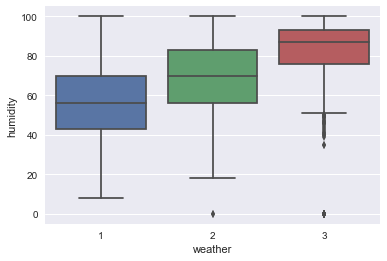

In [170]:
# 날씨와 습도의 관계

sns.boxplot(data=train, x="weather", y="humidity")

0.98494811048170694

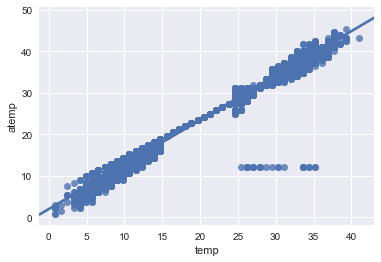

In [171]:
# 온도와 체감온도의 관계

sns.regplot(data=train, x="temp", y="atemp")
train["temp"].corr(train["atemp"])

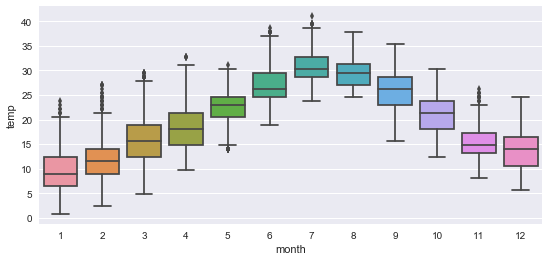

In [172]:
#월별 기온; 계절이 이상하게 코딩되어 있는데, 이를 고쳐야 하는지 알아보기 위함.

figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(9, 4)

sns.boxplot(data=train, x="month", y="temp")



Lessons learned #1 (날씨 관련)
- ~~기후 특성상 온도가 가을-여름-겨울-봄 순인 이상한 곳이다. -> season 수정으로 해결!~~
- 날씨와 습도는 밀접한 관련이 있다.
- 습도가 비정상적인 값이 존재한다. (e.g., weather == 2 | 3, 즉 최소 mist 이상의 날씨인데 습도가 0인 경우)
- 온도(temp)와 체감 온도(atemp)는 매우 밀접한 연관을 갖는다. (Pearson Corr. = 0.98) 따라서 둘 중 하나만 사용해야 한다.
- 기온이 증가하는데 체감 온도가 고정되어 있는 이상한 값들이 존재한다.

In [173]:
# 체감 온도가 이상하게 측정된 값들 도출; 24개인 것으로 보인다.

print(train[(train["temp"] > 24) & (train["atemp"] < 15 ) ].shape)
train[(train["temp"] > 24) & (train["atemp"] < 15 ) ].head()

(24, 22)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,tempdiff,year,month,day,hour,rushhour,str_year,str_month,ymonth,weekday
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,...,-15.76,2012,8,17,0,0.0,2012,8,2012_8,4
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,...,-14.94,2012,8,17,1,0.0,2012,8,2012_8,4
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,...,-14.94,2012,8,17,2,0.0,2012,8,2012_8,4
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,...,-14.12,2012,8,17,3,0.0,2012,8,2012_8,4
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,...,-14.12,2012,8,17,4,0.0,2012,8,2012_8,4


In [174]:
# 습도가 이상하게 측정된 값들 도출; weather 조건 걸지 않았음에도 불구하고 2,3만 나왔으므로 다음 코드로 도출된 값을 이상치로 판단한다.

train[train["humidity"] < 5].shape

(22, 22)

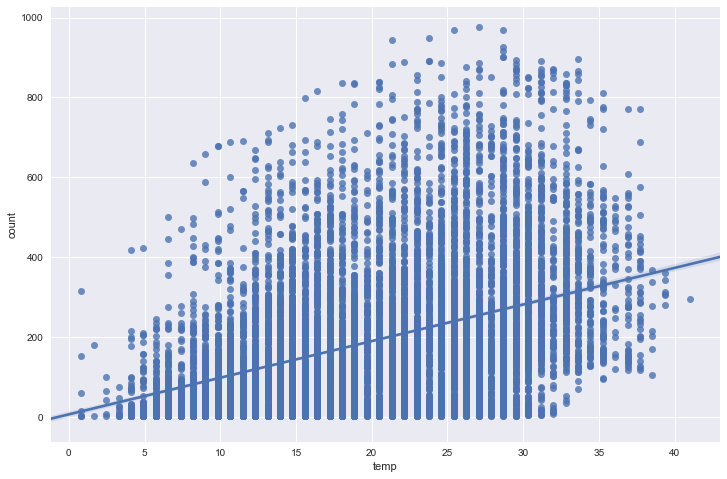

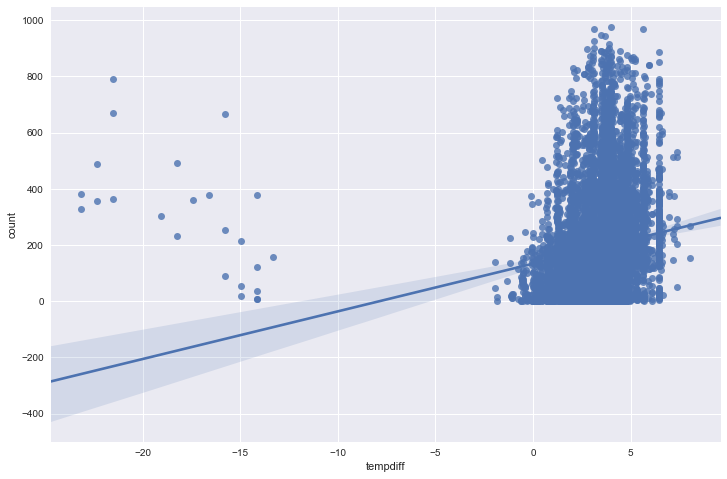

In [175]:
# 온도와 수요의 관계

figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(12,8)

sns.regplot(data=train, x="temp", y="count")


figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(12,8)

sns.regplot(data=train, x="tempdiff", y="count")

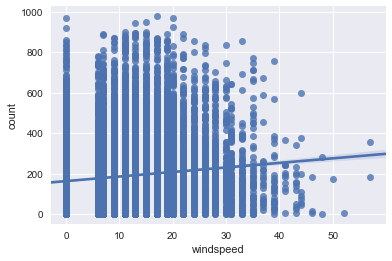

In [176]:
# 풍속(windspeed)과 수요의 관계

sns.regplot(data=train, x="windspeed", y="count")

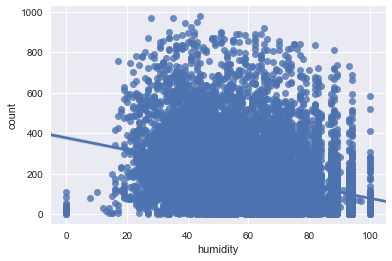

In [177]:
# 습도와 수요의 관계

sns.regplot(data=train, x="humidity", y="count")

### datetime 관련 시각화

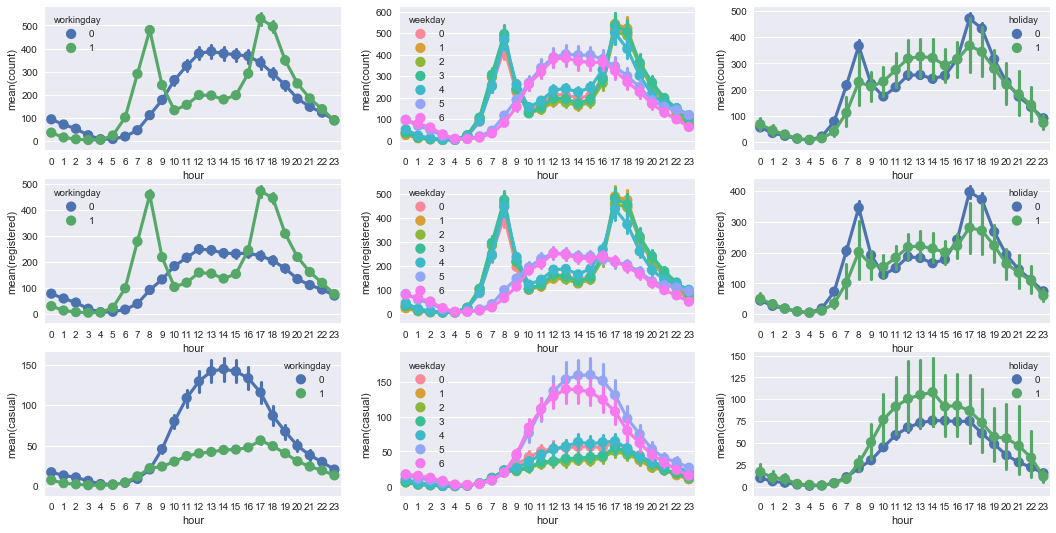

In [178]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(18,9)

# count: 1. 근무일과 비근무일
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax1)

# count: 2. weekday
sns.pointplot(data=train, x="hour", y="count", hue="weekday", ax=ax2)

# count: 3. holiday
sns.pointplot(data=train, x="hour", y="count", hue="holiday", ax=ax3)

# registered: 1. 근무일과 비근무일
sns.pointplot(data=train, x="hour", y="registered", hue="workingday", ax=ax4)

# registered: 2. weekday
sns.pointplot(data=train, x="hour", y="registered", hue="weekday", ax=ax5)

# registered: 3. holiday
sns.pointplot(data=train, x="hour", y="registered", hue="holiday", ax=ax6)

# casual: 1. 근무일과 비근무일
sns.pointplot(data=train, x="hour", y="casual", hue="workingday", ax=ax7)

# casual: 2. weekday
sns.pointplot(data=train, x="hour", y="casual", hue="weekday", ax=ax8)

# casual: 3. holiday
sns.pointplot(data=train, x="hour", y="casual", hue="holiday", ax=ax9)

lessons learned #2 (datetime)
- 근무일과 비근무일의 사용 패턴은 차이를 보인다.
 - 근무일에는 출퇴근 시간에 사용이 집중되는 반면, 비근무일에는 오후 시간대를 중심으로 완만한 수요를 보인다.
 

## Preprocessing

One-hot Encoding: Kaggle 점수를 위해 반드시 수행해야 하는 부분.
1. season
2. weather
3. ymonth: 시간이 흐름에 따라 대여량 자체가 증가하는 경향이 있으므로, 이를 반영하기 위해 ymonth 변수를 사용해야 하고, 그러기 위해서 이를 숫자 형태의 nominal data로 수정.
4. hour

In [179]:
# 1. season
train["season_spring"] = train["season"] ==1
train["season_summer"] = train["season"] ==2
train["season_fall"] = train["season"] ==3
train["season_winter"] = train["season"] ==4

# 2. weather
# weather_4는 데이터가 하나밖에 없으므로, 가장 유사한 날씨인 3에 합쳤다.
train["weather_1"] = train["weather"] ==1
train["weather_2"] = train["weather"] ==2
train["weather_3"] = train["weather"] ==3

# 3. ymonth
train["ymonth_1"] = train["ymonth"] == "2011_1"
train["ymonth_2"] = train["ymonth"] == "2011_2"
train["ymonth_3"] = train["ymonth"] == "2011_3"
train["ymonth_4"] = train["ymonth"] == "2011_4"
train["ymonth_5"] = train["ymonth"] == "2011_5"
train["ymonth_6"] = train["ymonth"] == "2011_6"
train["ymonth_7"] = train["ymonth"] == "2011_7"
train["ymonth_8"] = train["ymonth"] == "2011_8"
train["ymonth_9"] = train["ymonth"] == "2011_9"
train["ymonth_10"] = train["ymonth"] == "2011_10"
train["ymonth_11"] = train["ymonth"] == "2011_11"
train["ymonth_12"] = train["ymonth"] == "2011_12"
train["ymonth_13"] = train["ymonth"] == "2012_1"
train["ymonth_14"] = train["ymonth"] == "2012_2"
train["ymonth_15"] = train["ymonth"] == "2012_3"
train["ymonth_16"] = train["ymonth"] == "2012_4"
train["ymonth_17"] = train["ymonth"] == "2012_5"
train["ymonth_18"] = train["ymonth"] == "2012_6"
train["ymonth_19"] = train["ymonth"] == "2012_7"
train["ymonth_20"] = train["ymonth"] == "2012_8"
train["ymonth_21"] = train["ymonth"] == "2012_9"
train["ymonth_22"] = train["ymonth"] == "2012_10"
train["ymonth_23"] = train["ymonth"] == "2012_11"
train["ymonth_24"] = train["ymonth"] == "2012_12"

# 4. hour
train["hour_0"] = train["hour"] == 0
train["hour_1"] = train["hour"] == 1
train["hour_2"] = train["hour"] == 2
train["hour_3"] = train["hour"] == 3
train["hour_4"] = train["hour"] == 4
train["hour_5"] = train["hour"] == 5
train["hour_6"] = train["hour"] == 6
train["hour_7"] = train["hour"] == 7
train["hour_8"] = train["hour"] == 8
train["hour_9"] = train["hour"] == 9
train["hour_10"] = train["hour"] == 10
train["hour_11"] = train["hour"] == 11
train["hour_12"] = train["hour"] == 12
train["hour_13"] = train["hour"] == 13
train["hour_14"] = train["hour"] == 14
train["hour_15"] = train["hour"] == 15
train["hour_16"] = train["hour"] == 16
train["hour_17"] = train["hour"] == 17
train["hour_18"] = train["hour"] == 18
train["hour_19"] = train["hour"] == 19
train["hour_20"] = train["hour"] == 20
train["hour_21"] = train["hour"] == 21
train["hour_22"] = train["hour"] == 22
train["hour_23"] = train["hour"] == 23

train["ymonth_1"].head()

# 1. season
test["season_spring"] = test["season"] ==1
test["season_summer"] = test["season"] ==2
test["season_fall"] = test["season"] ==3
test["season_winter"] = test["season"] ==4

# 2. weather
test["weather_1"] = test["weather"] ==1
test["weather_2"] = test["weather"] ==2
test["weather_3"] = test["weather"] ==3

# 3. ymonth
test["ymonth_1"] = test["ymonth"] == "2011_1"
test["ymonth_2"] = test["ymonth"] == "2011_2"
test["ymonth_3"] = test["ymonth"] == "2011_3"
test["ymonth_4"] = test["ymonth"] == "2011_4"
test["ymonth_5"] = test["ymonth"] == "2011_5"
test["ymonth_6"] = test["ymonth"] == "2011_6"
test["ymonth_7"] = test["ymonth"] == "2011_7"
test["ymonth_8"] = test["ymonth"] == "2011_8"
test["ymonth_9"] = test["ymonth"] == "2011_9"
test["ymonth_10"] = test["ymonth"] == "2011_10"
test["ymonth_11"] = test["ymonth"] == "2011_11"
test["ymonth_12"] = test["ymonth"] == "2011_12"
test["ymonth_13"] = test["ymonth"] == "2012_1"
test["ymonth_14"] = test["ymonth"] == "2012_2"
test["ymonth_15"] = test["ymonth"] == "2012_3"
test["ymonth_16"] = test["ymonth"] == "2012_4"
test["ymonth_17"] = test["ymonth"] == "2012_5"
test["ymonth_18"] = test["ymonth"] == "2012_6"
test["ymonth_19"] = test["ymonth"] == "2012_7"
test["ymonth_20"] = test["ymonth"] == "2012_8"
test["ymonth_21"] = test["ymonth"] == "2012_9"
test["ymonth_22"] = test["ymonth"] == "2012_10"
test["ymonth_23"] = test["ymonth"] == "2012_11"
test["ymonth_24"] = test["ymonth"] == "2012_12"

# 4. hour
test["hour_0"] = test["hour"] == 0
test["hour_1"] = test["hour"] == 1
test["hour_2"] = test["hour"] == 2
test["hour_3"] = test["hour"] == 3
test["hour_4"] = test["hour"] == 4
test["hour_5"] = test["hour"] == 5
test["hour_6"] = test["hour"] == 6
test["hour_7"] = test["hour"] == 7
test["hour_8"] = test["hour"] == 8
test["hour_9"] = test["hour"] == 9
test["hour_10"] = test["hour"] == 10
test["hour_11"] = test["hour"] == 11
test["hour_12"] = test["hour"] == 12
test["hour_13"] = test["hour"] == 13
test["hour_14"] = test["hour"] == 14
test["hour_15"] = test["hour"] == 15
test["hour_16"] = test["hour"] == 16
test["hour_17"] = test["hour"] == 17
test["hour_18"] = test["hour"] == 18
test["hour_19"] = test["hour"] == 19
test["hour_20"] = test["hour"] == 20
test["hour_21"] = test["hour"] == 21
test["hour_22"] = test["hour"] == 22
test["hour_23"] = test["hour"] == 23

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,tempdiff,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0.705,...,False,False,False,False,False,False,False,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2.975,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2.975,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2.220,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2.220,...,False,False,False,False,False,False,False,False,False,False


missing data
1. windspeed: 바람이 '0'인 경우, NaN과 같이 생각한다. 따라서 직전과 직후 시간의 풍속의 평균을 넣어준다. 모두 존재하지 않을 경우, 가장 인접한 곳의 평균을 넣어준다.
2. atemp: ~~체감 온도가 오기입된 부분은 temp와 atemp의 회귀식을 통해 temp에 맞는 값을 집어 넣는다. (하지 않는다; temp만 사용)~~
3. humidity: 0으로 기입된 부분은 해당 weather의 평균 humidity 입력

In [180]:
# windspeed
# mean_wind: 데이터가 시간 순으로 정렬되어 있으므로, 직전 시간과 직후 시간의 windspeed의 평균을 구해 0에 집어 넣는다.
'''
단, windspeed의 결측값이 2개 data 이상에서 연속 발생하는 경우가 있으므로, 
data가 존재하는 직전/직후 시간의 windspeed를 구하고 평균을 도출하여 첫 번째 결측값에 집어 넣는다.
그러면 다음 결측값은 채워진 첫번째 결측값과 존재하는 upper bound windspeed의 평균이 됨.
즉, 여러 개의 missing data가 연속적으로 발생할 때, 평균에서 시작하여 단조증가하여 upper bound에 이름.
(사실 완벽한 방법은 아닌데, 그냥 해보자)
'''

j = 0
lower_wind = 0
upper_wind = 0
mean_wind = 0

train.loc[0, "windspeed"] = 6.0032

       
for i in range (1, 10886):
    
    if train.loc[i, "windspeed"] == 0:

        j = i-1
        while True:
            if train.loc[j, "windspeed"] != 0:
                lower_wind = train.loc[j, "windspeed"]
                print (lower_wind)
                break
            j = j-1
    
        j = i+1
        while True:
            if train.loc[j, "windspeed"] != 0:
                upper_wind = train.loc[j, "windspeed"]
                print (upper_wind)
                break
            j = j+1
    
        mean_wind = (lower_wind + upper_wind) / 2
        
        train.loc[i, "windspeed"] = mean_wind

j = 0
lower_wind = 0
upper_wind = 0
mean_wind = 0        
        
for i in range (0, 6493):
    
    if test.loc[i, "windspeed"] == 0:

        j = i-1
        while True:
            if test.loc[j, "windspeed"] != 0:
                lower_wind = test.loc[j, "windspeed"]
                print (lower_wind)
                break
            j = j-1
    
        j = i+1
        while True:
            if test.loc[j, "windspeed"] != 0:
                upper_wind = test.loc[j, "windspeed"]
                print (upper_wind)
                break
            j = j+1
    
        mean_wind = (lower_wind + upper_wind) / 2
        
        test.loc[i, "windspeed"] = mean_wind


6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
16.9979
11.50055
16.9979
14.249225
16.9979
15.6235625
16.9979
7.0015
7.0015
7.0015
6.0032
6.0032
6.0032
8.9981
6.0032
7.50065
6.0032
6.751925
6.0032
6.3775625
6.0032
7.0015
6.0032
6.50235
6.0032
6.252775
6.0032
6.1279875
6.0032
6.0032
7.0015
11.0014
11.0014
8.9981
8.9981
8.9981
8.9981
11.0014
6.0032
6.0032
11.0014
8.9981
6.0032
7.0015
12.998
6.0032
11.0014
11.0014
8.9981
11.0014
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
7.0015
6.50235
7.0015
6.751925
7.0015
7.0015
8.9981
19.0012
8.9981
6.0032
11.0014
8.9981
7.0015
6.0032
8.9981
7.50065
8.9981
7.0015
6.0032
6.50235
6.0032
6.252775
6.0032
6.1279875
6.0032
6.06559375
6.0032
6.034396875
6.0032
6.0187984375
6.0032
6.01099921875
6.0032
6.00709960937
6.0032
6.00514980469
6.0032
6.00417490234
6.0032
6.0032
8.9981
8.9981
7.0015
6.0032
12.998
11.0014
6.0032
7.0015
7.0015
7.0015
7.0015
8.9981
8.9981
8.9981
8.9981
6.0032
6.0032
11.0014
8.9981
9

6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
7.0015
7.0015
6.0032
11.0014
8.9981
6.0032
7.0015
6.50235
7.0015
8.9981
8.9981
7.0015
12.998
7.0015
7.0015
7.0015
7.0015
7.0015
11.0014
9.00145
11.0014
8.9981
8.9981
6.0032
7.0015
6.50235
7.0015
6.751925
7.0015
6.8767125
7.0015
6.93910625
7.0015
16.9979
7.0015
11.9997
7.0015
8.9981
15.0013
15.0013
7.0015
6.0032
6.0032
8.9981
8.9981
7.0015
6.0032
6.0032
7.0015
8.9981
6.0032
7.50065
6.0032
6.751925
6.0032
19.9995
11.0014
15.50045
11.0014
13.250925
11.0014
11.0014
6.0032
8.5023
6.0032
6.0032
7.0015
19.9995
8.9981
7.0015
6.0032
6.0032
6.0032
6.0032
6.0032
8.9981
6.0032
7.50065
6.0032
6.0032
6.0032
7.0015
7.0015
7.0015
7.0015
7.0015
7.0015
7.0015
7.0015
7.0015
7.0015
7.0015
6.0032
6.0032
6.0032
6.0032
7.0015
6.50235
7.0015
6.751925
7.0015
6.8767125
7.0015
8.9981
6.0032
6.0032
6.0032
6.0032
6.0032
12.998
8.9981
10.99805
8.9981
9.998075
8.9981
7.0015
6.0032
6.0032
7.0015
6.50235
7.0015
7.0015
19.0012
13.00135
19.0012
7.0015
6.0032
6.0032
7.0015

7.0015
6.0032
6.50235
6.0032
6.0032
6.0032
6.0032
7.0015
7.0015
8.9981
7.9998
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
8.9981
7.0015
7.0015
7.0015
6.0032
6.0032
6.0032
6.0032
12.998
9.5006
12.998
7.0015
6.0032
8.9981
6.0032
7.50065
6.0032
6.0032
16.9979
11.50055
16.9979
6.0032
11.0014
8.5023
11.0014
15.0013
7.0015
7.0015
16.9979
8.9981
16.9979
6.0032
7.0015
6.50235
7.0015
12.998
6.0032
6.0032
7.0015
6.50235
7.0015
7.0015
6.0032
6.0032
15.0013
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
7.0015
6.50235
7.0015
6.751925
7.0015
8.9981
6.0032
7.0015
6.0032
11.0014
8.9981
6.0032
7.0015
6.50235
7.0015
6.0032
7.0015
8.9981
8.9981
12.998
15.0013
7.0015
6.0032
6.50235
6.0032
11.0014
6.0032
8.5023
6.0032
7.25275
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
6.0032
11.0014
7.0015
16.9979
15.0013
19.9995


In [181]:
# humidity

mean_humid = train.groupby("weather")["humidity"].mean()
print (mean_humid)

mean_humid_w1 = mean_humid[1]
mean_humid_w2 = mean_humid[2]
mean_humid_w3 = mean_humid[3]

train.loc[((train["humidity"] == 0) & (train["weather"] == 1)), "humidity"] = mean_humid_w1
train.loc[((train["humidity"] == 0) & (train["weather"] == 2)), "humidity"] = mean_humid_w2
train.loc[((train["humidity"] == 0) & (train["weather"] == 3)), "humidity"] = mean_humid_w3

mean_humid = test.groupby("weather")["humidity"].mean()
print (mean_humid)

mean_humid_w1 = mean_humid[1]
mean_humid_w2 = mean_humid[2]
mean_humid_w3 = mean_humid[3]

test.loc[((test["humidity"] == 0) & (test["weather"] == 1)), "humidity"] = mean_humid_w1
test.loc[((test["humidity"] == 0) & (test["weather"] == 2)), "humidity"] = mean_humid_w2
test.loc[((test["humidity"] == 0) & (test["weather"] == 3)), "humidity"] = mean_humid_w3

weather
1    56.716769
2    69.100565
3    81.346512
Name: humidity, dtype: float64
weather
1    58.495617
2    71.173684
3    84.960854
Name: humidity, dtype: float64


normalization: Decision tree 기반 알고리즘에서는 수행하지 않아도 된다. (각 feature들을 개별적으로 분석하기 때문에 단위의 영향력이 존재하지 않는다) 그러나 model selection을 위해서는 꼭 필요하므로, 미리 수행해 본다.

feature selection(?)

In [ ]:
# 적절한 feature 수를 판별해보기 위함.
# 특히, temp와 atemp가 어떤 관계인지를 알아보자.


### ** 현재까지의 training data 저장하기 (엑셀 추가 분석)
(필요할 때만 실행하기)

In [95]:
# 현재까지의 manipulated data를 새로운 파일로 저장 (엑셀에서 추가 분석하기 위함)

train.to_csv("train_manipulated.csv", index=False)

## Applying ML

scoring method: 본 competition의 kaggle 공식 cost function인 RMSLE(Root Mean Square Logarithmic Error) 적용할 것 (sklearn으로 작성)

In [74]:
train.columns

feature_names = ["holiday", "workingday", "temp", "humidity", "windspeed", "year", "hour", 
                 "rushhour", "weekday", "season_spring", "season_summer", "season_fall", "season_winter",
                "weather_1", "weather_2", "weather_3",
                 "hour_0", "hour_1", "hour_2", "hour_3", "hour_4", "hour_5", "hour_6", "hour_7", "hour_8", "hour_9",
                "hour_10", "hour_11", "hour_12", "hour_13", "hour_14", "hour_15", "hour_16", "hour_17", "hour_18", "hour_19",
                "hour_20", "hour_21", "hour_22", "hour_23",
                "ymonth_1", "ymonth_2", "ymonth_3", "ymonth_4", "ymonth_5", "ymonth_6", "ymonth_7", "ymonth_8",
                "ymonth_9", "ymonth_10", "ymonth_11", "ymonth_12", "ymonth_13", "ymonth_14", "ymonth_15", "ymonth_16",
                "ymonth_17", "ymonth_18", "ymonth_19", "ymonth_20", "ymonth_21", "ymonth_22", "ymonth_23", "ymonth_24"
                ]

feature_names1 = ["holiday", "workingday", "temp", "humidity", "windspeed", "year", "hour", 
                 "rushhour", "weekday", "season_spring", "season_summer", "season_fall", "season_winter",
                "weather_1", "weather_2", "weather_3",
                 "hour_0", "hour_1", "hour_2", "hour_3", "hour_4", "hour_5", "hour_6", "hour_7", "hour_8", "hour_9",
                "hour_10", "hour_11", "hour_12", "hour_13", "hour_14", "hour_15", "hour_16", "hour_17", "hour_18", "hour_19",
                "hour_20", "hour_21", "hour_22", "hour_23",
                "ymonth_1", "ymonth_2", "ymonth_3", "ymonth_4", "ymonth_5", "ymonth_6", "ymonth_7", "ymonth_8",
                "ymonth_9", "ymonth_10", "ymonth_11", "ymonth_12", "ymonth_13", "ymonth_14", "ymonth_15", "ymonth_16",
                "ymonth_17", "ymonth_18", "ymonth_19", "ymonth_20", "ymonth_21", "ymonth_22", "ymonth_23", "ymonth_24"
                ]


# casual은 rushhour와 관련이 없으므로 제거.
feature_names2 = ["holiday", "workingday", "temp", "humidity", "windspeed", "year", "hour", 
                 "weekday", "season_spring", "season_summer", "season_fall", "season_winter",
                "weather_1", "weather_2", "weather_3",
                 "hour_0", "hour_1", "hour_2", "hour_3", "hour_4", "hour_5", "hour_6", "hour_7", "hour_8", "hour_9",
                "hour_10", "hour_11", "hour_12", "hour_13", "hour_14", "hour_15", "hour_16", "hour_17", "hour_18", "hour_19",
                "hour_20", "hour_21", "hour_22", "hour_23",
                "ymonth_1", "ymonth_2", "ymonth_3", "ymonth_4", "ymonth_5", "ymonth_6", "ymonth_7", "ymonth_8",
                "ymonth_9", "ymonth_10", "ymonth_11", "ymonth_12", "ymonth_13", "ymonth_14", "ymonth_15", "ymonth_16",
                "ymonth_17", "ymonth_18", "ymonth_19", "ymonth_20", "ymonth_21", "ymonth_22", "ymonth_23", "ymonth_24"
                ]

In [75]:
X_train = train[feature_names]
X_train1 = train[feature_names1]
X_train2 = train[feature_names2]

X_test = test[feature_names]
X_test1 = test[feature_names1]
X_test2 = test[feature_names2]

In [76]:
# registered와 casual의 패턴이 다르므로, 나눠서 예측한 후 더하기한다.

label_name = "count"
label_name1 = "registered"
label_name2 = "casual"

y_train = train[label_name]
y_train1 = train[label_name1]
y_train2 = train[label_name2]

### score = Root Mean Squared Logarithmic Error, RMSLE.

In [183]:
from sklearn.metrics import make_scorer
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

print(rmsle([1, 2, 3], [1, 2, 3]))
print(rmsle([1, 2, 3], [2, 3, 4]))
print(rmsle([1, 2, 3], [1, 4, 9]))

rmsle_score = make_scorer(rmsle)
rmsle_score

0.0
0.314619332526
0.605676350101


make_scorer(rmsle)

In [185]:
from sklearn.ensemble import RandomForestRegressor

seed = 39

model = RandomForestRegressor(random_state = seed, n_estimators = 200, n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=39,
           verbose=0, warm_start=False)

In [190]:
from sklearn.cross_validation import cross_val_score

# 따로 예측할껀데, 이 때 이렇게 하는 것이 맞는지 모르겠다.


score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmsle_score).mean() 
score1 = cross_val_score(model, X_train1, y_train1, cv=20, scoring=rmsle_score).mean() 
score2 = cross_val_score(model, X_train1, y_train2, cv=20, scoring=rmsle_score).mean()

print("Score = {0:.5f}".format(score))
print("Score1 = {0:.5f}".format(score1))
print("Score2 = {0:.5f}".format(score2))

# score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmsle_score).mean()

# print("Score = {0:.5f}".format(score))

Score = 0.39920
Score1 = 0.39850
Score2 = 0.57940


In [187]:
# y_train = y_train1 + y_train2

#model.fit(X_train1, y_train1)
#model.fit(X_train2, y_train2)
model.fit(X_train, y_train)

#predictions = model.predict(X_test1) + model.predict(X_test2)
predictions = model.predict(X_test)

predictions[:3]

array([ 15.4  ,   4.805,   4.69 ])

In [188]:
submission = pd.read_csv("sampleSubmission.csv")

submission["count"] = predictions

submission.head()

,datetime,count
0,2011-01-20 00:00:00,15.400
1,2011-01-20 01:00:00,4.805
2,2011-01-20 02:00:00,4.690
3,2011-01-20 03:00:00,3.655
4,2011-01-20 04:00:00,2.900


In [189]:
from datetime import datetime

current_date = datetime.now()
current_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")

description = "baseline-script"

filename = "{date}_{score:.5f}_{desc}.csv".format(date=current_date, score=score, desc=description)
filepath = "{filename}".format(filename=filename)

submission.to_csv(filepath, index=False)